In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
df=pd.read_csv('weather_data.csv',header=0)
df.head(3)

,,,,,,,,,,,,,,,,datetime;T_mu;Po_mu;P_mu;Ff_mu;Tn_mu;Tx_mu;VV_mu;Td_mu;T_var;Po_var;P_var;Ff_var;Tn_var;Tx_var;VV_var;Td_var
2015-09-03;13,7375;759,3625;759,6750000000001;3,125;12,75;14,8;14,775;12,749999999999998;2,1055357142857143;0,1226785714285851;0,12785714285711605;1,5535714285714286;2,205000000000003;0,31999999999999845;115,73357142857142;1,85714285714282
2015-09-04;14,825;758,175;758,5124999999999;2,25;12,7;17,049999999999997;18,125;12,825;7,345000000000004;1,7821428571428892;1,7555357142856711;1,357142857142857;13,52000000000001;3,6450000000000027;68,12500000000001;2,165000000000001
2015-09-05;14,275;752,7375;753,0625;2,75;13,0;16,25;21,35;11,7625;1,7107142857142856;1,051249999999863;1,099821428571344;0,7857142857142858;2,0;0,125;77,03714285714285;1,434107142857144


In [3]:
#importing the data properly by using required parameters

data = pd.read_csv('weather_data.csv',parse_dates=['datetime'], sep=';', decimal=',', infer_datetime_format=True)
data.head()

,datetime,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
0,2015-09-03,13.7375,759.3625,759.6750,3.125000,12.75,14.80,14.775,12.7500,2.105536,0.122679,0.127857,1.553571,2.205,0.320,115.733571,1.008571
1,2015-09-04,14.8250,758.1750,758.5125,2.250000,12.70,17.05,18.125,12.8250,7.345000,1.782143,1.755536,1.357143,13.520,3.645,68.125000,2.165000
2,2015-09-05,14.2750,752.7375,753.0625,2.750000,13.00,16.25,21.350,11.7625,1.710714,1.051250,1.099821,0.785714,2.000,0.125,77.037143,1.434107
3,2015-09-06,13.1250,753.1750,753.5125,1.857143,11.25,15.30,20.875,11.6625,5.679286,0.250714,0.252679,0.809524,3.125,3.920,53.839286,1.474107
4,2015-09-07,12.0875,753.8500,754.1875,3.750000,11.15,13.85,19.125,11.2125,0.678393,0.202857,0.206964,4.500000,0.845,0.405,64.410714,0.541250


## Data Dictionary

- The data are average daily temperatures collected by the weather station 2978 in Helsinki from September 2015 to May 2019. Our main here is T_mu which we need to predict . “T_mu” is showing the average daily air temperature, in degrees Celsius, 2 meters above the earth surface.

In [4]:
data.shape

(1346, 17)

In [5]:
#Selecting the date and T_mu columns

data=data[['datetime','T_mu']]
data.head()

,datetime,T_mu
0,2015-09-03,13.7375
1,2015-09-04,14.8250
2,2015-09-05,14.2750
3,2015-09-06,13.1250
4,2015-09-07,12.0875


In [6]:
print('Time period start: {}\nTime period end: {}'.format(data.datetime.min(),data.datetime.max()))

Time period start: 2015-09-03 00:00:00
Time period end: 2019-05-21 00:00:00


In [7]:
# Reset the index 
data.set_index("datetime", inplace=True)
data.head()

,T_mu
datetime,
2015-09-03,13.7375
2015-09-04,14.8250
2015-09-05,14.2750
2015-09-06,13.1250
2015-09-07,12.0875


In [8]:
data.describe()

,T_mu
count,1346.000000
mean,6.367627
std,8.180675
min,-22.675000
25%,0.768750
50%,5.535417
75%,13.424554
max,26.145833


# Data Visualizations

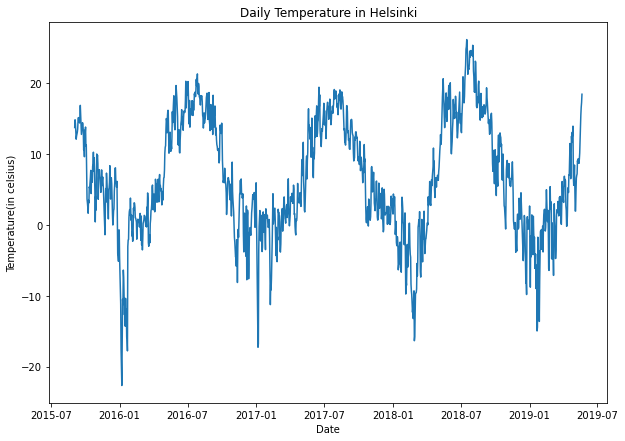

In [9]:
plt.figure(figsize=(10,7))
plt.plot(data)
plt.gca().set(title='Daily Temperature in Helsinki',xlabel='Date',ylabel='Temperature(in celsius)');

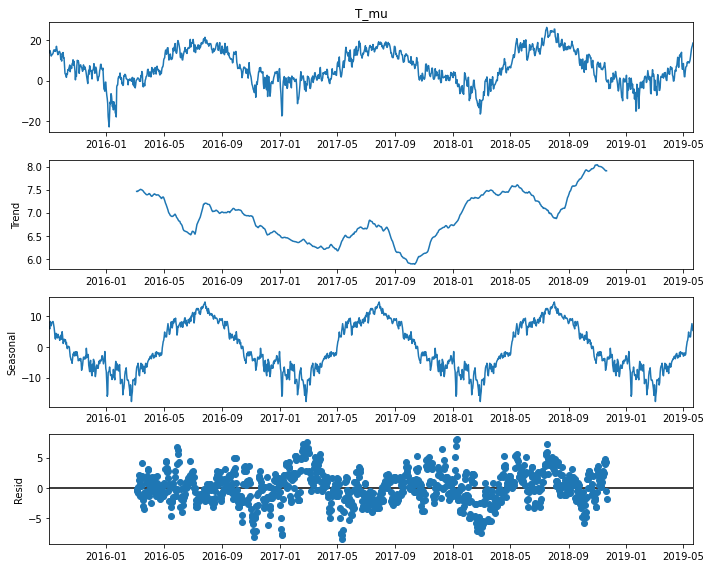

In [10]:
# Decomposing the data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data.T_mu,model='additive',period=365)
fig = decomposition.plot()

### Checking the stationarity of the data

#### - Using ACF and PACF plots

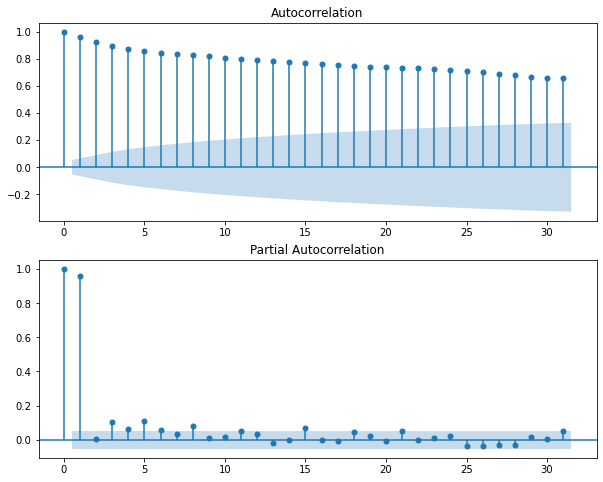

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(data.T_mu,ax=plt.gca(),lags=31)
plt.subplot(212)
plot_pacf(data.T_mu,ax=plt.gca(),lags=31)
plt.show()

#### - Using Augmented Dickey-Fuller Test

In [12]:
from statsmodels.tsa.stattools import adfuller
test=adfuller(data,autolag='AIC')
print('Test statistic: ' , test[0])
print('p value :',test[1])
print('Critical Values:' ,test[4])

Test statistic:  -3.0370330414016964
p value : 0.031577746006642295
Critical Values: {'1%': -3.435246778744666, '5%': -2.863702546181002, '10%': -2.5679213448446134}


#### - Rolling statistics

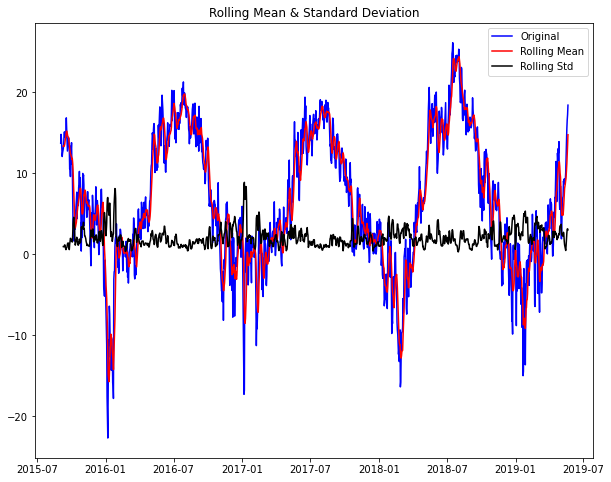

In [13]:
#Determing rolling statistics
rolmean = data.rolling(7).mean()
rolstd = data.rolling(7).std()

#Plot rolling statistics:
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- From all the three tests performed above we can say that our time series data is stationary 
- We have constant Mean and Variance, and our Test statistic is less than Critical Values, so we already have stationary Time series. So our 'd' value will become 0 in ARIMA Model.

## Building model using auto arima

In [16]:
pip install pmdarima

  Using cached pmdarima-1.8.0-cp38-cp38-win_amd64.whl (616 kB)
  Using cached Cython-0.29.17-cp38-cp38-win_amd64.whl (1.7 MB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
Note: you may need to restart the kernel to use updated packages.


# ARIMA - AutoRegressive Integrated Moving Average.
### ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends.

#### Pmdarima (originally pyramid-arima, for the anagram of 'py' + 'arima') is a statistical library designed to fill the void in Python's time series analysis capabilities.

In [17]:
#importing and building auto arima model
from pmdarima import auto_arima
model = auto_arima(data,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True,seasonal=True)

#dividing the data into train and test and fitting the model
train = data[:int(0.70*(len(data)))]
valid = data[int(0.70*(len(data))):]
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5936.312, Time=3.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9480.760, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5978.054, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8080.932, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10116.688, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5961.328, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5979.427, Time=0.62 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=5945.635, Time=1.22 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=5938.311, Time=0.86 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5980.034, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=5953.875, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5936.373, Time=0.82 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=5939.870, Time=1.25 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5938.337, Time=0.58 sec

Best model:  ARIMA(2,0,2)(0,0,0

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [18]:
#forecasting on validation dataset
forecast=model.predict(len(valid))

In [19]:
forecast_df = pd.DataFrame(forecast,index=valid.index,columns=['prediction'])
forecast_df.head()

,prediction
datetime,
2018-04-09,3.531720
2018-04-10,3.131160
2018-04-11,2.856729
2018-04-12,2.671906
2018-04-13,2.550715


In [20]:
pd.concat([valid,forecast_df],axis=1)

,T_mu,prediction
datetime,,
2018-04-09,6.112500,3.531720
2018-04-10,3.337500,3.131160
2018-04-11,2.900000,2.856729
2018-04-12,2.737500,2.671906
2018-04-13,4.437500,2.550715
...,...,...
2019-05-17,13.783333,5.932263
2019-05-18,15.508333,5.933156
2019-05-19,16.595833,5.934040


In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(valid, forecast)
print('RMSE :', np.sqrt(mse))

RMSE : 9.512523801778046


## Building model using ARIMA

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
from statsmodels.tsa.arima_model import ARIMA

#fitting the model
model = ARIMA(train.values, order=(2,0,2))
model_fit = model.fit(disp=0)
#print(model_fit.summary())

#forecasting on validation data
output = model_fit.forecast(len(valid))
pred=output[0]

#RMSE Score
print('RMSE :', np.sqrt(mean_squared_error(valid, pred)))

RMSE : 9.511911508019672


## Building model using SARIMA

### Seasonal Autoregressive Integrated Moving Average
###  SARIMA stands for Seasonal Autoregressive Integrated Moving Average (quite a mouthful). It's very much like ARIMA but more powerful. 

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(0, 1, 1, 31),enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit(disp=False)

pred = model_fit.forecast(len(valid))

#RMSE Score
print('RMSE :', np.sqrt(mean_squared_error(valid, pred)))

RMSE : 9.046857629197103
